<a href="https://colab.research.google.com/github/HyeJeongIm/BP_Project/blob/main/_BP_hv3_4(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# batch_size

In [ ]:
import h5py
# from vis.visualization import visualize_cam, overlay
from tensorflow.keras import activations
#from vis.utils import utils
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import tensorflow.compat.v1 as tf
import tensorflow.keras as keras
# from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta, Nadam
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import io
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
TensorFlow version :  2.3.0
Keras version :  2.4.0


In [ ]:
import numpy as np
from scipy import io

# 데이터 파일 불러오기
# train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/train_shuffled_raw_v1.mat')
# test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/test_not_shuffled_raw_v1.mat')

train_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/train_shuffled_raw_v3.mat')
test_data = io.loadmat('C:/Users/LEE/Desktop/imhzz/new/test_not_shuffled_raw_v3.mat')

X_train = train_data['data_shuffled']
X_test = test_data['data_not_shuffled']

sbp_train = train_data['sbp_total']
sbp_test = test_data['sbp_total']
dbp_train = train_data['dbp_total']
dbp_test = test_data['dbp_total']


In [ ]:
print(X_train.shape)
print(X_test.shape) 

print(sbp_train.shape)
print(sbp_test.shape)
print(dbp_train.shape)
print(dbp_test.shape)

(168743, 127)
(43293, 127)
(168743, 1)
(43293, 1)
(168743, 1)
(43293, 1)


In [ ]:
import pandas as pd

df_train_raw = pd.DataFrame(X_train)
df_train_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.397525,0.576176,0.782368,0.343816,0.0,0.325039,0.166250,0.58625,0.141250,0.130000,...,0.21750,0.193750,0.172500,0.151250,0.131250,0.111250,0.08875,0.061250,0.577695,0.334739
1,0.403687,0.576176,0.782368,0.343816,0.0,0.309897,0.166250,0.57500,0.140000,0.129375,...,0.21625,0.195000,0.173750,0.152500,0.132500,0.112500,0.08875,0.062500,0.588482,0.335669
2,0.405556,0.576176,0.782368,0.343816,0.0,0.317237,0.163750,0.57500,0.138125,0.127500,...,0.22375,0.201250,0.180000,0.158750,0.137500,0.115000,0.09250,0.063750,0.694625,0.386111
3,0.396543,0.576176,0.782368,0.343816,0.0,0.315348,0.168750,0.58875,0.140000,0.130000,...,0.22500,0.203125,0.180625,0.158125,0.136875,0.115625,0.09250,0.063125,0.701718,0.390863
4,0.391071,0.576176,0.782368,0.343816,0.0,0.320688,0.170625,0.59125,0.143750,0.131875,...,0.23000,0.207500,0.183750,0.161250,0.138750,0.116250,0.09250,0.063750,0.700430,0.381499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.264083,0.505748,0.826316,0.416961,0.0,0.491736,0.273750,0.84875,0.238750,0.215000,...,0.49875,0.351250,0.305000,0.259375,0.200625,0.148125,0.11000,0.073125,0.668204,0.339492
99,0.265455,0.505748,0.826316,0.416961,0.0,0.497504,0.325000,0.78750,0.275000,0.255000,...,0.31875,0.292500,0.265000,0.236250,0.202500,0.166250,0.12875,0.086250,0.535449,0.290942
100,0.258081,0.505748,0.826316,0.416961,0.0,0.498717,0.287500,0.80250,0.255000,0.230000,...,0.31500,0.287500,0.260625,0.230625,0.198750,0.163125,0.12625,0.084375,0.531307,0.294047
101,0.261381,0.505748,0.826316,0.416961,0.0,0.490427,0.335000,0.77625,0.291250,0.255000,...,0.30625,0.280000,0.252500,0.223750,0.192500,0.158750,0.12375,0.085000,0.550623,0.297881


In [ ]:
df_test_raw = pd.DataFrame(X_test)
df_test_raw.head(103)

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.409346,0.196754,0.843158,0.327208,0.0,0.334396,0.165625,0.568750,0.136875,0.126875,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
1,0.412235,0.196754,0.843158,0.327208,0.0,0.312476,0.165625,0.562500,0.137500,0.125625,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
2,0.407614,0.196754,0.843158,0.327208,0.0,0.326504,0.167500,0.568750,0.140000,0.128750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
3,0.407614,0.196754,0.843158,0.327208,0.0,0.356952,0.160000,0.577500,0.135000,0.123750,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
4,0.401500,0.196754,0.843158,0.327208,0.0,0.341285,0.161250,0.582500,0.136250,0.126250,...,0.229375,0.18625,0.15875,0.13875,0.1200,0.10125,0.08125,0.05625,0.764316,0.425633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.352657,0.521650,0.867368,0.406007,0.0,0.389110,0.208750,0.641250,0.174375,0.162500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
99,0.354369,0.521650,0.867368,0.406007,0.0,0.376453,0.203750,0.631250,0.170000,0.157500,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
100,0.349282,0.521650,0.867368,0.406007,0.0,0.384221,0.214375,0.641875,0.181250,0.166250,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698
101,0.350962,0.521650,0.867368,0.406007,0.0,0.384311,0.205625,0.646250,0.171250,0.158125,...,0.285000,0.26000,0.23125,0.20500,0.1775,0.14625,0.11125,0.07500,0.675251,0.329698


In [ ]:
total_me = 0
total_std = 0

In [ ]:
#parameter
batch_size = 1024
epochs = 500
lrate = 0.001

# SBP

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model

model = model1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                4096      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5

In [ ]:
# model = model1()
# model.summary()

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 3s 17ms/step - loss: 12323.2998 - val_loss: 12471.4033
Epoch 2/500
165/165 [==============================] - 3s 16ms/step - loss: 12001.0820 - val_loss: 11357.3232
Epoch 3/500
165/165 [==============================] - 3s 16ms/step - loss: 11654.6348 - val_loss: 11199.0537
Epoch 4/500
165/165 [==============================] - 3s 16ms/step - loss: 11178.9561 - val_loss: 9854.3965
Epoch 5/500
165/165 [==============================] - 3s 16ms/step - loss: 10582.4160 - val_loss: 8661.6279
Epoch 6/500
165/165 [==============================] - 2s 15ms/step - loss: 9889.9453 - val_loss: 8138.6240
Epoch 7/500
165/165 [==============================] - 3s 16ms/step - loss: 9097.0488 - val_loss: 6830.6670
Epoch 8/500
165/165 [==============================] - 3s 16ms/step - loss: 8222.8877 - val_loss: 6772.3867
Epoch 9/500
165/165 [==============================] - 3s 16ms/step - loss: 7254.0742 - val_loss: 9802.7275
Epoch 10/500
165/165

165/165 [==============================] - 3s 16ms/step - loss: 80.2691 - val_loss: 118.7589
Epoch 78/500
165/165 [==============================] - 6s 36ms/step - loss: 79.7410 - val_loss: 110.0854
Epoch 79/500
165/165 [==============================] - 3s 15ms/step - loss: 79.2271 - val_loss: 115.4147
Epoch 80/500
165/165 [==============================] - 3s 16ms/step - loss: 78.7615 - val_loss: 125.3992
Epoch 81/500
165/165 [==============================] - 3s 16ms/step - loss: 79.1235 - val_loss: 127.0990
Epoch 82/500
165/165 [==============================] - 3s 16ms/step - loss: 77.6955 - val_loss: 117.9695
Epoch 83/500
165/165 [==============================] - 3s 16ms/step - loss: 77.3079 - val_loss: 99.8918
Epoch 84/500
165/165 [==============================] - 3s 16ms/step - loss: 76.8722 - val_loss: 105.2529
Epoch 85/500
165/165 [==============================] - 8s 46ms/step - loss: 76.6785 - val_loss: 104.4362
Epoch 86/500
165/165 [==============================] - 3s 1

165/165 [==============================] - 3s 16ms/step - loss: 66.0384 - val_loss: 146.3671
Epoch 155/500
165/165 [==============================] - 3s 16ms/step - loss: 65.9457 - val_loss: 103.2531
Epoch 156/500
165/165 [==============================] - 2s 15ms/step - loss: 65.9695 - val_loss: 121.6368
Epoch 157/500
165/165 [==============================] - 3s 16ms/step - loss: 66.1001 - val_loss: 100.6689
Epoch 158/500
165/165 [==============================] - 3s 15ms/step - loss: 66.1767 - val_loss: 106.3042
Epoch 159/500
165/165 [==============================] - 3s 15ms/step - loss: 65.7822 - val_loss: 128.9893
Epoch 160/500
165/165 [==============================] - 3s 16ms/step - loss: 65.1577 - val_loss: 93.4422
Epoch 161/500
165/165 [==============================] - 3s 15ms/step - loss: 65.2717 - val_loss: 90.1595
Epoch 162/500
165/165 [==============================] - 3s 15ms/step - loss: 65.0841 - val_loss: 97.5599
Epoch 163/500
165/165 [==============================]

165/165 [==============================] - 3s 16ms/step - loss: 60.9989 - val_loss: 97.4280
Epoch 232/500
165/165 [==============================] - 3s 16ms/step - loss: 61.0898 - val_loss: 98.2435
Epoch 233/500
165/165 [==============================] - 3s 16ms/step - loss: 60.9129 - val_loss: 101.8883
Epoch 234/500
165/165 [==============================] - 4s 25ms/step - loss: 60.8967 - val_loss: 90.7465
Epoch 235/500
165/165 [==============================] - 3s 16ms/step - loss: 60.9372 - val_loss: 94.2479
Epoch 236/500
165/165 [==============================] - 3s 16ms/step - loss: 60.9302 - val_loss: 105.8427
Epoch 237/500
165/165 [==============================] - 3s 16ms/step - loss: 60.8824 - val_loss: 91.0163
Epoch 238/500
165/165 [==============================] - 3s 16ms/step - loss: 60.7619 - val_loss: 126.7822
Epoch 239/500
165/165 [==============================] - 3s 16ms/step - loss: 60.7380 - val_loss: 100.6451
Epoch 240/500
165/165 [==============================] -

165/165 [==============================] - 3s 16ms/step - loss: 58.8692 - val_loss: 88.1711
Epoch 309/500
165/165 [==============================] - 3s 16ms/step - loss: 58.5690 - val_loss: 101.3821
Epoch 310/500
165/165 [==============================] - 3s 16ms/step - loss: 58.7146 - val_loss: 101.5520
Epoch 311/500
165/165 [==============================] - 3s 16ms/step - loss: 58.8648 - val_loss: 122.9411
Epoch 312/500
165/165 [==============================] - 3s 16ms/step - loss: 58.8005 - val_loss: 92.6662
Epoch 313/500
165/165 [==============================] - 2s 15ms/step - loss: 59.1330 - val_loss: 98.3038
Epoch 314/500
165/165 [==============================] - 2s 15ms/step - loss: 58.9715 - val_loss: 92.0148
Epoch 315/500
165/165 [==============================] - 2s 15ms/step - loss: 58.7927 - val_loss: 88.7038
Epoch 316/500
165/165 [==============================] - 3s 15ms/step - loss: 58.8834 - val_loss: 92.8334
Epoch 317/500
165/165 [==============================] - 

165/165 [==============================] - 3s 16ms/step - loss: 57.7269 - val_loss: 90.2761
Epoch 386/500
165/165 [==============================] - 3s 16ms/step - loss: 57.7429 - val_loss: 87.0868
Epoch 387/500
165/165 [==============================] - 3s 15ms/step - loss: 57.6714 - val_loss: 116.4084
Epoch 388/500
165/165 [==============================] - 3s 16ms/step - loss: 57.8737 - val_loss: 92.2541
Epoch 389/500
165/165 [==============================] - 3s 16ms/step - loss: 57.6429 - val_loss: 85.4188
Epoch 390/500
165/165 [==============================] - 3s 16ms/step - loss: 57.6734 - val_loss: 94.3191
Epoch 391/500
165/165 [==============================] - 3s 16ms/step - loss: 57.4551 - val_loss: 89.9189
Epoch 392/500
165/165 [==============================] - 3s 16ms/step - loss: 57.6277 - val_loss: 103.8506
Epoch 393/500
165/165 [==============================] - 3s 15ms/step - loss: 57.7012 - val_loss: 91.6551
Epoch 394/500
165/165 [==============================] - 3

165/165 [==============================] - 3s 16ms/step - loss: 56.7749 - val_loss: 93.7875
Epoch 463/500
165/165 [==============================] - 3s 16ms/step - loss: 56.7555 - val_loss: 85.7370
Epoch 464/500
165/165 [==============================] - 3s 16ms/step - loss: 56.9343 - val_loss: 84.4424
Epoch 465/500
165/165 [==============================] - 3s 16ms/step - loss: 56.8267 - val_loss: 94.1934
Epoch 466/500
165/165 [==============================] - 3s 16ms/step - loss: 56.9416 - val_loss: 87.0864
Epoch 467/500
165/165 [==============================] - 3s 16ms/step - loss: 56.6903 - val_loss: 92.2273
Epoch 468/500
165/165 [==============================] - 3s 16ms/step - loss: 56.7985 - val_loss: 85.8529
Epoch 469/500
165/165 [==============================] - 3s 16ms/step - loss: 56.6579 - val_loss: 85.0431
Epoch 470/500
165/165 [==============================] - 3s 16ms/step - loss: 56.7469 - val_loss: 109.1010
Epoch 471/500
165/165 [==============================] - 3s

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.174429792406134 
MAE:  7.014545628758179 
SD:  9.331917127731725


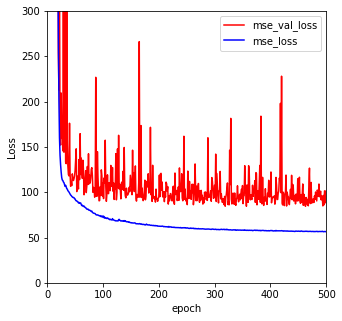

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)                128       
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32)                128       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 3s 17ms/step - loss: 12388.9111 - val_loss: 12249.5742
Epoch 2/500
165/165 [==============================] - 3s 16ms/step - loss: 12015.1318 - val_loss: 11996.3223
Epoch 3/500
165/165 [==============================] - 3s 16ms/step - loss: 11569.1172 - val_loss: 11389.5537
Epoch 4/500
165/165 [==============================] - 3s 16ms/step - loss: 10985.5684 - val_loss: 10794.4844
Epoch 5/500
165/165 [==============================] - 3s 16ms/step - loss: 10251.5234 - val_loss: 10437.8301
Epoch 6/500
165/165 [==============================] - 3s 16ms/step - loss: 9414.0869 - val_loss: 8328.3350
Epoch 7/500
165/165 [==============================] - 3s 16ms/step - loss: 8536.7451 - val_loss: 7881.2451
Epoch 8/500
165/165 [==============================] - 3s 16ms/step - loss: 7632.5840 - val_loss: 7180.1484
Epoch 9/500
165/165 [==============================] - 3s 16ms/step - loss: 6729.9297 - val_loss: 6835.3618
Epoch 10/500
165/1

165/165 [==============================] - 3s 16ms/step - loss: 80.1180 - val_loss: 102.4326
Epoch 78/500
165/165 [==============================] - 3s 16ms/step - loss: 80.2365 - val_loss: 97.6207
Epoch 79/500
165/165 [==============================] - 3s 16ms/step - loss: 79.2455 - val_loss: 116.7721
Epoch 80/500
165/165 [==============================] - 3s 16ms/step - loss: 78.8732 - val_loss: 149.2778
Epoch 81/500
165/165 [==============================] - 4s 25ms/step - loss: 78.5903 - val_loss: 113.4991
Epoch 82/500
165/165 [==============================] - 3s 16ms/step - loss: 78.0301 - val_loss: 109.9105
Epoch 83/500
165/165 [==============================] - 3s 16ms/step - loss: 78.2270 - val_loss: 106.4147
Epoch 84/500
165/165 [==============================] - 3s 16ms/step - loss: 77.2974 - val_loss: 135.7794
Epoch 85/500
165/165 [==============================] - 3s 16ms/step - loss: 77.4419 - val_loss: 104.7140
Epoch 86/500
165/165 [==============================] - 3s 1

165/165 [==============================] - 3s 15ms/step - loss: 67.8867 - val_loss: 135.6662
Epoch 155/500
165/165 [==============================] - 3s 16ms/step - loss: 67.3331 - val_loss: 133.4301
Epoch 156/500
165/165 [==============================] - 3s 16ms/step - loss: 67.2223 - val_loss: 104.6858
Epoch 157/500
165/165 [==============================] - 3s 16ms/step - loss: 67.2600 - val_loss: 104.8898
Epoch 158/500
165/165 [==============================] - 3s 16ms/step - loss: 67.2689 - val_loss: 133.8067
Epoch 159/500
165/165 [==============================] - 3s 16ms/step - loss: 66.9851 - val_loss: 101.2411
Epoch 160/500
165/165 [==============================] - 3s 16ms/step - loss: 67.1567 - val_loss: 126.5960
Epoch 161/500
165/165 [==============================] - 3s 16ms/step - loss: 67.0195 - val_loss: 122.2258
Epoch 162/500
165/165 [==============================] - 3s 16ms/step - loss: 67.2371 - val_loss: 99.7831
Epoch 163/500
165/165 [=============================

165/165 [==============================] - 1s 7ms/step - loss: 64.6583 - val_loss: 109.9106
Epoch 232/500
165/165 [==============================] - 1s 7ms/step - loss: 64.6592 - val_loss: 101.8430
Epoch 233/500
165/165 [==============================] - 1s 7ms/step - loss: 64.2137 - val_loss: 100.7139
Epoch 234/500
165/165 [==============================] - 1s 6ms/step - loss: 64.8786 - val_loss: 89.3247
Epoch 235/500
165/165 [==============================] - 1s 6ms/step - loss: 64.2069 - val_loss: 141.4962
Epoch 236/500
165/165 [==============================] - 1s 7ms/step - loss: 64.0269 - val_loss: 93.4809
Epoch 237/500
165/165 [==============================] - 1s 7ms/step - loss: 63.8026 - val_loss: 110.0055
Epoch 238/500
165/165 [==============================] - 1s 7ms/step - loss: 63.5526 - val_loss: 106.3287
Epoch 239/500
165/165 [==============================] - 1s 7ms/step - loss: 64.1786 - val_loss: 109.9915
Epoch 240/500
165/165 [==============================] - 1s 7m

Epoch 309/500
165/165 [==============================] - 1s 7ms/step - loss: 62.1868 - val_loss: 93.3416
Epoch 310/500
165/165 [==============================] - 1s 7ms/step - loss: 62.0451 - val_loss: 96.1700
Epoch 311/500
165/165 [==============================] - 1s 6ms/step - loss: 62.0871 - val_loss: 95.3689
Epoch 312/500
165/165 [==============================] - 1s 6ms/step - loss: 61.9939 - val_loss: 102.3984
Epoch 313/500
165/165 [==============================] - 1s 6ms/step - loss: 61.6306 - val_loss: 120.8068
Epoch 314/500
165/165 [==============================] - 1s 7ms/step - loss: 61.4439 - val_loss: 88.0775
Epoch 315/500
165/165 [==============================] - 1s 7ms/step - loss: 61.4609 - val_loss: 102.0199
Epoch 316/500
165/165 [==============================] - 1s 7ms/step - loss: 61.5622 - val_loss: 109.1994
Epoch 317/500
165/165 [==============================] - 1s 7ms/step - loss: 61.3854 - val_loss: 94.7426
Epoch 318/500
165/165 [============================

165/165 [==============================] - 1s 7ms/step - loss: 60.1388 - val_loss: 89.3470
Epoch 387/500
165/165 [==============================] - 1s 7ms/step - loss: 60.2194 - val_loss: 105.9075
Epoch 388/500
165/165 [==============================] - 1s 7ms/step - loss: 60.2770 - val_loss: 94.4362
Epoch 389/500
165/165 [==============================] - 1s 7ms/step - loss: 60.0752 - val_loss: 93.8839
Epoch 390/500
165/165 [==============================] - 1s 7ms/step - loss: 60.5140 - val_loss: 96.0828
Epoch 391/500
165/165 [==============================] - 1s 7ms/step - loss: 60.0655 - val_loss: 93.5880
Epoch 392/500
165/165 [==============================] - 1s 7ms/step - loss: 60.1030 - val_loss: 136.4619
Epoch 393/500
165/165 [==============================] - 1s 7ms/step - loss: 59.9811 - val_loss: 89.6295
Epoch 394/500
165/165 [==============================] - 1s 7ms/step - loss: 59.9213 - val_loss: 89.6718
Epoch 395/500
165/165 [==============================] - 1s 7ms/ste

165/165 [==============================] - 1s 7ms/step - loss: 58.6688 - val_loss: 94.7733
Epoch 464/500
165/165 [==============================] - 1s 7ms/step - loss: 58.4991 - val_loss: 126.1152
Epoch 465/500
165/165 [==============================] - 1s 7ms/step - loss: 58.6858 - val_loss: 95.9417
Epoch 466/500
165/165 [==============================] - 1s 7ms/step - loss: 58.9137 - val_loss: 97.4205
Epoch 467/500
165/165 [==============================] - 1s 7ms/step - loss: 59.1564 - val_loss: 104.3757
Epoch 468/500
165/165 [==============================] - 1s 7ms/step - loss: 59.3105 - val_loss: 104.5915
Epoch 469/500
165/165 [==============================] - 1s 7ms/step - loss: 59.3712 - val_loss: 96.1642
Epoch 470/500
165/165 [==============================] - 1s 7ms/step - loss: 58.9905 - val_loss: 135.9800
Epoch 471/500
165/165 [==============================] - 1s 7ms/step - loss: 59.0824 - val_loss: 89.6384
Epoch 472/500
165/165 [==============================] - 1s 7ms/s

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -2.7105438260699484 
MAE:  7.527559899548526 
SD:  9.566198059625961


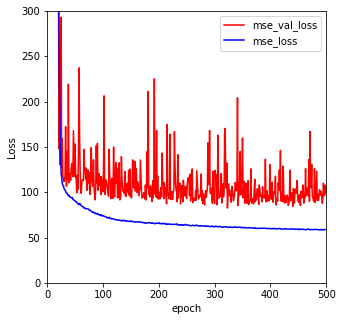

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32)                128       
_________________________________________________________________
activation_22 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)                128       
_________________________________________________________________
activation_23 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
history = model.fit(X_train, sbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, sbp_test))


Epoch 1/500
165/165 [==============================] - 1s 8ms/step - loss: 12123.9844 - val_loss: 12135.0049
Epoch 2/500
165/165 [==============================] - 1s 7ms/step - loss: 11633.0674 - val_loss: 11092.9980
Epoch 3/500
165/165 [==============================] - 1s 6ms/step - loss: 11029.5332 - val_loss: 10867.0547
Epoch 4/500
165/165 [==============================] - 1s 7ms/step - loss: 10253.8184 - val_loss: 10243.3008
Epoch 5/500
165/165 [==============================] - 1s 7ms/step - loss: 9264.1592 - val_loss: 7088.0093
Epoch 6/500
165/165 [==============================] - 1s 7ms/step - loss: 8213.6455 - val_loss: 10094.0908
Epoch 7/500
165/165 [==============================] - 1s 7ms/step - loss: 7139.6909 - val_loss: 8278.6348
Epoch 8/500
165/165 [==============================] - 1s 7ms/step - loss: 6077.7539 - val_loss: 3799.7434
Epoch 9/500
165/165 [==============================] - 1s 7ms/step - loss: 5058.2178 - val_loss: 3401.3420
Epoch 10/500
165/165 [======

165/165 [==============================] - 1s 7ms/step - loss: 76.3101 - val_loss: 105.6451
Epoch 79/500
165/165 [==============================] - 1s 6ms/step - loss: 76.2475 - val_loss: 95.8003
Epoch 80/500
165/165 [==============================] - 1s 6ms/step - loss: 75.6565 - val_loss: 105.8187
Epoch 81/500
165/165 [==============================] - 1s 6ms/step - loss: 75.3719 - val_loss: 114.8302
Epoch 82/500
165/165 [==============================] - 1s 6ms/step - loss: 75.6054 - val_loss: 101.5883
Epoch 83/500
165/165 [==============================] - 1s 6ms/step - loss: 75.3099 - val_loss: 164.1155
Epoch 84/500
165/165 [==============================] - 1s 6ms/step - loss: 75.4343 - val_loss: 91.2662
Epoch 85/500
165/165 [==============================] - 1s 7ms/step - loss: 74.6482 - val_loss: 99.3103
Epoch 86/500
165/165 [==============================] - 1s 7ms/step - loss: 74.1672 - val_loss: 185.6378
Epoch 87/500
165/165 [==============================] - 1s 7ms/step - l

Epoch 156/500
165/165 [==============================] - 1s 7ms/step - loss: 65.4459 - val_loss: 92.5829
Epoch 157/500
165/165 [==============================] - 1s 7ms/step - loss: 65.3485 - val_loss: 126.4165
Epoch 158/500
165/165 [==============================] - 1s 7ms/step - loss: 65.4828 - val_loss: 121.9715
Epoch 159/500
165/165 [==============================] - 1s 6ms/step - loss: 65.3658 - val_loss: 124.2958
Epoch 160/500
165/165 [==============================] - 1s 6ms/step - loss: 64.8708 - val_loss: 98.4632
Epoch 161/500
165/165 [==============================] - 1s 7ms/step - loss: 64.9791 - val_loss: 113.6211
Epoch 162/500
165/165 [==============================] - 1s 7ms/step - loss: 65.1252 - val_loss: 199.4585
Epoch 163/500
165/165 [==============================] - 1s 7ms/step - loss: 64.7773 - val_loss: 104.1344
Epoch 164/500
165/165 [==============================] - 1s 7ms/step - loss: 64.0570 - val_loss: 95.4896
Epoch 165/500
165/165 [==========================

165/165 [==============================] - 1s 7ms/step - loss: 61.1643 - val_loss: 88.2505
Epoch 234/500
165/165 [==============================] - 1s 7ms/step - loss: 61.4713 - val_loss: 91.8024
Epoch 235/500
165/165 [==============================] - 1s 7ms/step - loss: 61.2848 - val_loss: 133.4335
Epoch 236/500
165/165 [==============================] - 1s 7ms/step - loss: 60.9970 - val_loss: 150.2687
Epoch 237/500
165/165 [==============================] - 1s 7ms/step - loss: 60.8342 - val_loss: 95.8832
Epoch 238/500
165/165 [==============================] - 1s 7ms/step - loss: 60.9373 - val_loss: 105.2481
Epoch 239/500
165/165 [==============================] - 1s 7ms/step - loss: 61.0687 - val_loss: 91.7281
Epoch 240/500
165/165 [==============================] - 1s 7ms/step - loss: 61.5743 - val_loss: 150.0017
Epoch 241/500
165/165 [==============================] - 1s 7ms/step - loss: 60.7898 - val_loss: 105.3815
Epoch 242/500
165/165 [==============================] - 1s 7ms/

Epoch 311/500
165/165 [==============================] - 1s 7ms/step - loss: 58.4620 - val_loss: 96.2048
Epoch 312/500
165/165 [==============================] - 1s 7ms/step - loss: 58.7232 - val_loss: 126.9647
Epoch 313/500
165/165 [==============================] - 1s 7ms/step - loss: 58.4120 - val_loss: 102.1439
Epoch 314/500
165/165 [==============================] - 1s 6ms/step - loss: 58.4480 - val_loss: 88.6147
Epoch 315/500
165/165 [==============================] - 1s 7ms/step - loss: 58.6728 - val_loss: 87.6286
Epoch 316/500
165/165 [==============================] - 1s 7ms/step - loss: 58.9992 - val_loss: 128.5385
Epoch 317/500
165/165 [==============================] - 1s 7ms/step - loss: 58.5468 - val_loss: 95.8086
Epoch 318/500
165/165 [==============================] - 1s 7ms/step - loss: 58.5704 - val_loss: 91.9887
Epoch 319/500
165/165 [==============================] - 1s 7ms/step - loss: 58.5835 - val_loss: 114.1848
Epoch 320/500
165/165 [============================

165/165 [==============================] - 2s 14ms/step - loss: 57.5897 - val_loss: 110.3590
Epoch 389/500
165/165 [==============================] - 2s 14ms/step - loss: 57.0247 - val_loss: 93.2692
Epoch 390/500
165/165 [==============================] - 2s 14ms/step - loss: 57.0421 - val_loss: 90.6512
Epoch 391/500
165/165 [==============================] - 2s 14ms/step - loss: 57.1075 - val_loss: 108.2897
Epoch 392/500
165/165 [==============================] - 2s 14ms/step - loss: 57.2592 - val_loss: 92.1239
Epoch 393/500
165/165 [==============================] - 2s 14ms/step - loss: 57.1357 - val_loss: 89.5887
Epoch 394/500
165/165 [==============================] - 2s 14ms/step - loss: 57.1087 - val_loss: 106.5385
Epoch 395/500
165/165 [==============================] - 2s 14ms/step - loss: 56.9008 - val_loss: 95.0540
Epoch 396/500
165/165 [==============================] - 2s 15ms/step - loss: 57.1968 - val_loss: 100.8473
Epoch 397/500
165/165 [==============================] -

Epoch 465/500
165/165 [==============================] - 2s 14ms/step - loss: 56.4149 - val_loss: 91.3474
Epoch 466/500
165/165 [==============================] - 2s 15ms/step - loss: 56.2681 - val_loss: 94.1295
Epoch 467/500
165/165 [==============================] - 2s 14ms/step - loss: 56.3160 - val_loss: 91.8763
Epoch 468/500
165/165 [==============================] - 4s 22ms/step - loss: 56.4371 - val_loss: 91.9095
Epoch 469/500
165/165 [==============================] - 2s 14ms/step - loss: 56.3542 - val_loss: 89.5867
Epoch 470/500
165/165 [==============================] - 2s 14ms/step - loss: 56.3173 - val_loss: 90.5787
Epoch 471/500
165/165 [==============================] - 2s 14ms/step - loss: 56.3829 - val_loss: 89.3251
Epoch 472/500
165/165 [==============================] - 2s 14ms/step - loss: 56.5150 - val_loss: 98.7631
Epoch 473/500
165/165 [==============================] - 2s 14ms/step - loss: 56.3209 - val_loss: 87.0221
Epoch 474/500
165/165 [=======================

In [ ]:
pred = model.predict(X_test)
err = sbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

# 오차의 평균 낮으면 좋은거야 , std 오차들의 표준편차 작으면 좋은거야 
# 앙상블 , 
total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -3.246382805285643 
MAE:  7.607974872071703 
SD:  9.341384543331005


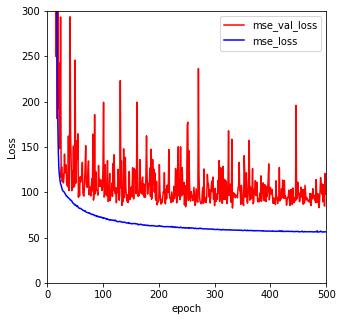

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(history.history['val_loss'],color='red')
   
plt.plot(history.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -1.5941656129831525 
Ensemble_std:  9.41316657689623


# DBP

In [ ]:
total_me = 0
total_std = 0

## 1

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32)                128       
_________________________________________________________________
activation_33 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32)                128       
_________________________________________________________________
activation_34 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 3s 16ms/step - loss: 3681.2466 - val_loss: 3693.5564
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 3472.0801 - val_loss: 3219.0527
Epoch 3/500
165/165 [==============================] - 2s 15ms/step - loss: 3199.6089 - val_loss: 2873.2378
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 2863.7527 - val_loss: 2611.9648
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 2473.2131 - val_loss: 2022.1865
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 2015.3867 - val_loss: 1176.2686
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 1592.1071 - val_loss: 1612.4009
Epoch 8/500
165/165 [==============================] - 2s 15ms/step - loss: 1210.7032 - val_loss: 1578.8312
Epoch 9/500
165/165 [==============================] - 4s 22ms/step - loss: 887.2531 - val_loss: 351.3552
Epoch 10/500
165/165 [========

Epoch 79/500
165/165 [==============================] - 1s 7ms/step - loss: 28.9614 - val_loss: 38.5533
Epoch 80/500
165/165 [==============================] - 1s 7ms/step - loss: 28.7727 - val_loss: 38.5466
Epoch 81/500
165/165 [==============================] - 1s 6ms/step - loss: 28.5703 - val_loss: 34.5101
Epoch 82/500
165/165 [==============================] - 1s 6ms/step - loss: 28.7002 - val_loss: 41.5471
Epoch 83/500
165/165 [==============================] - 1s 6ms/step - loss: 28.5354 - val_loss: 48.9513
Epoch 84/500
165/165 [==============================] - 1s 6ms/step - loss: 28.4111 - val_loss: 37.3595
Epoch 85/500
165/165 [==============================] - 1s 7ms/step - loss: 28.3250 - val_loss: 48.8520
Epoch 86/500
165/165 [==============================] - 1s 6ms/step - loss: 28.3920 - val_loss: 53.5645
Epoch 87/500
165/165 [==============================] - 1s 7ms/step - loss: 28.3852 - val_loss: 49.8508
Epoch 88/500
165/165 [==============================] - 1s 7ms/s

165/165 [==============================] - 1s 7ms/step - loss: 25.6031 - val_loss: 47.5869
Epoch 158/500
165/165 [==============================] - 1s 7ms/step - loss: 25.5512 - val_loss: 42.1523
Epoch 159/500
165/165 [==============================] - 1s 7ms/step - loss: 25.7244 - val_loss: 35.8786
Epoch 160/500
165/165 [==============================] - 1s 7ms/step - loss: 25.5267 - val_loss: 39.8407
Epoch 161/500
165/165 [==============================] - 1s 7ms/step - loss: 25.4812 - val_loss: 38.4758
Epoch 162/500
165/165 [==============================] - 1s 7ms/step - loss: 25.5073 - val_loss: 39.5098
Epoch 163/500
165/165 [==============================] - 1s 7ms/step - loss: 25.5169 - val_loss: 56.2843
Epoch 164/500
165/165 [==============================] - 1s 7ms/step - loss: 25.5442 - val_loss: 40.8617
Epoch 165/500
165/165 [==============================] - 1s 7ms/step - loss: 25.7777 - val_loss: 39.7390
Epoch 166/500
165/165 [==============================] - 1s 7ms/step 

165/165 [==============================] - 2s 14ms/step - loss: 24.0779 - val_loss: 34.5139
Epoch 235/500
165/165 [==============================] - 2s 15ms/step - loss: 24.0635 - val_loss: 38.4695
Epoch 236/500
165/165 [==============================] - 2s 14ms/step - loss: 24.0450 - val_loss: 35.6348
Epoch 237/500
165/165 [==============================] - 4s 22ms/step - loss: 24.0728 - val_loss: 36.0495
Epoch 238/500
165/165 [==============================] - 2s 15ms/step - loss: 24.0302 - val_loss: 36.7833
Epoch 239/500
165/165 [==============================] - 2s 15ms/step - loss: 24.1023 - val_loss: 38.7186
Epoch 240/500
165/165 [==============================] - 2s 15ms/step - loss: 24.1309 - val_loss: 38.3584
Epoch 241/500
165/165 [==============================] - 2s 14ms/step - loss: 24.0836 - val_loss: 35.7527
Epoch 242/500
165/165 [==============================] - 2s 14ms/step - loss: 24.1123 - val_loss: 40.1254
Epoch 243/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 14ms/step - loss: 23.3078 - val_loss: 35.3908
Epoch 312/500
165/165 [==============================] - 2s 15ms/step - loss: 23.2251 - val_loss: 34.1397
Epoch 313/500
165/165 [==============================] - 2s 14ms/step - loss: 23.1198 - val_loss: 34.9805
Epoch 314/500
165/165 [==============================] - 2s 14ms/step - loss: 23.0887 - val_loss: 40.2933
Epoch 315/500
165/165 [==============================] - 2s 15ms/step - loss: 23.3009 - val_loss: 36.8257
Epoch 316/500
165/165 [==============================] - 4s 22ms/step - loss: 23.1557 - val_loss: 32.9516
Epoch 317/500
165/165 [==============================] - 2s 14ms/step - loss: 23.0967 - val_loss: 32.7967
Epoch 318/500
165/165 [==============================] - 2s 15ms/step - loss: 23.1371 - val_loss: 35.9978
Epoch 319/500
165/165 [==============================] - 2s 14ms/step - loss: 23.0931 - val_loss: 34.9356
Epoch 320/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 22.5156 - val_loss: 36.6531
Epoch 389/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5923 - val_loss: 36.8715
Epoch 390/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5152 - val_loss: 35.1103
Epoch 391/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5032 - val_loss: 33.7034
Epoch 392/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5336 - val_loss: 36.5572
Epoch 393/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5902 - val_loss: 34.2458
Epoch 394/500
165/165 [==============================] - 2s 15ms/step - loss: 22.6806 - val_loss: 32.5133
Epoch 395/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5144 - val_loss: 35.8946
Epoch 396/500
165/165 [==============================] - 2s 14ms/step - loss: 22.4845 - val_loss: 34.5957
Epoch 397/500
165/165 [==============================] - 4s 

165/165 [==============================] - 2s 15ms/step - loss: 22.1436 - val_loss: 34.9933
Epoch 466/500
165/165 [==============================] - 2s 15ms/step - loss: 22.2410 - val_loss: 33.5839
Epoch 467/500
165/165 [==============================] - 2s 14ms/step - loss: 22.1237 - val_loss: 38.0438
Epoch 468/500
165/165 [==============================] - 2s 15ms/step - loss: 22.1793 - val_loss: 35.9864
Epoch 469/500
165/165 [==============================] - 4s 22ms/step - loss: 22.1469 - val_loss: 35.6772
Epoch 470/500
165/165 [==============================] - 2s 14ms/step - loss: 22.0899 - val_loss: 36.0878
Epoch 471/500
165/165 [==============================] - 2s 15ms/step - loss: 22.1556 - val_loss: 34.9077
Epoch 472/500
165/165 [==============================] - 2s 15ms/step - loss: 22.1098 - val_loss: 35.7291
Epoch 473/500
165/165 [==============================] - 2s 15ms/step - loss: 22.0851 - val_loss: 33.2050
Epoch 474/500
165/165 [==============================] - 2s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -1.8176357876063023 
MAE:  4.804397115484172 
SD:  5.899681379434153


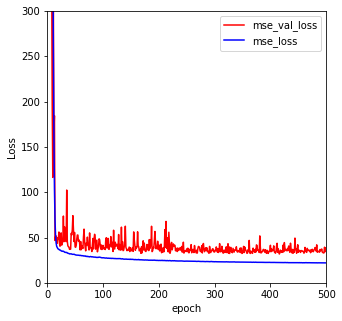

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 2

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_44 (Batc (None, 32)                128       
_________________________________________________________________
activation_44 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_45 (Batc (None, 32)                128       
_________________________________________________________________
activation_45 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 3s 15ms/step - loss: 3742.4314 - val_loss: 3712.7642
Epoch 2/500
165/165 [==============================] - 2s 15ms/step - loss: 3546.8508 - val_loss: 3325.5256
Epoch 3/500
165/165 [==============================] - ETA: 0s - loss: 3309.67 - 2s 15ms/step - loss: 3302.1125 - val_loss: 3073.5881
Epoch 4/500
165/165 [==============================] - 2s 15ms/step - loss: 2999.9358 - val_loss: 3132.0745
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 2655.6113 - val_loss: 3149.4297
Epoch 6/500
165/165 [==============================] - 2s 14ms/step - loss: 2295.0862 - val_loss: 2916.9954
Epoch 7/500
165/165 [==============================] - 2s 14ms/step - loss: 1902.1168 - val_loss: 1458.4504
Epoch 8/500
165/165 [==============================] - 2s 15ms/step - loss: 1487.4017 - val_loss: 375.7902
Epoch 9/500
165/165 [==============================] - 2s 15ms/step - loss: 1079.1620 - val_loss: 2251.1001
Epo

165/165 [==============================] - 2s 14ms/step - loss: 27.1440 - val_loss: 37.8653
Epoch 79/500
165/165 [==============================] - 2s 15ms/step - loss: 27.0755 - val_loss: 63.1418
Epoch 80/500
165/165 [==============================] - 4s 22ms/step - loss: 26.8657 - val_loss: 36.7644
Epoch 81/500
165/165 [==============================] - 2s 15ms/step - loss: 26.8806 - val_loss: 34.6551
Epoch 82/500
165/165 [==============================] - 2s 15ms/step - loss: 26.7362 - val_loss: 43.6967
Epoch 83/500
165/165 [==============================] - 2s 14ms/step - loss: 26.5784 - val_loss: 39.5708
Epoch 84/500
165/165 [==============================] - 2s 15ms/step - loss: 26.6993 - val_loss: 52.0078
Epoch 85/500
165/165 [==============================] - 2s 14ms/step - loss: 26.5464 - val_loss: 49.9012
Epoch 86/500
165/165 [==============================] - 2s 15ms/step - loss: 26.5507 - val_loss: 39.5442
Epoch 87/500
165/165 [==============================] - 2s 15ms/step

165/165 [==============================] - 4s 23ms/step - loss: 24.1786 - val_loss: 36.1422
Epoch 156/500
165/165 [==============================] - 2s 15ms/step - loss: 24.1138 - val_loss: 38.5306
Epoch 157/500
165/165 [==============================] - 2s 14ms/step - loss: 24.0454 - val_loss: 39.6195
Epoch 158/500
165/165 [==============================] - 2s 15ms/step - loss: 24.0710 - val_loss: 42.5529
Epoch 159/500
165/165 [==============================] - 2s 14ms/step - loss: 24.0281 - val_loss: 35.5736
Epoch 160/500
165/165 [==============================] - 2s 15ms/step - loss: 23.9441 - val_loss: 33.1732
Epoch 161/500
165/165 [==============================] - 2s 15ms/step - loss: 23.9861 - val_loss: 42.5229
Epoch 162/500
165/165 [==============================] - 2s 15ms/step - loss: 24.0420 - val_loss: 34.1468
Epoch 163/500
165/165 [==============================] - 2s 14ms/step - loss: 24.0075 - val_loss: 38.6366
Epoch 164/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 23.0619 - val_loss: 39.5069
Epoch 233/500
165/165 [==============================] - 2s 14ms/step - loss: 23.1559 - val_loss: 40.6591
Epoch 234/500
165/165 [==============================] - 2s 15ms/step - loss: 23.0644 - val_loss: 39.0232
Epoch 235/500
165/165 [==============================] - 2s 14ms/step - loss: 23.0633 - val_loss: 33.2024
Epoch 236/500
165/165 [==============================] - 2s 15ms/step - loss: 22.9529 - val_loss: 38.8156
Epoch 237/500
165/165 [==============================] - 2s 15ms/step - loss: 22.9854 - val_loss: 39.0246
Epoch 238/500
165/165 [==============================] - 2s 14ms/step - loss: 22.9823 - val_loss: 33.9337
Epoch 239/500
165/165 [==============================] - 2s 15ms/step - loss: 22.9556 - val_loss: 35.8681
Epoch 240/500
165/165 [==============================] - 2s 15ms/step - loss: 23.0873 - val_loss: 33.5844
Epoch 241/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 22.5252 - val_loss: 43.4030
Epoch 310/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5512 - val_loss: 37.1084
Epoch 311/500
165/165 [==============================] - 2s 15ms/step - loss: 22.4742 - val_loss: 37.1208
Epoch 312/500
165/165 [==============================] - 2s 15ms/step - loss: 22.3574 - val_loss: 34.9583
Epoch 313/500
165/165 [==============================] - 2s 15ms/step - loss: 22.3588 - val_loss: 40.7572
Epoch 314/500
165/165 [==============================] - 2s 15ms/step - loss: 22.4156 - val_loss: 43.7787
Epoch 315/500
165/165 [==============================] - 4s 23ms/step - loss: 22.3866 - val_loss: 43.9302
Epoch 316/500
165/165 [==============================] - 2s 15ms/step - loss: 22.4481 - val_loss: 35.8066
Epoch 317/500
165/165 [==============================] - 2s 15ms/step - loss: 22.4186 - val_loss: 32.8860
Epoch 318/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 22.1887 - val_loss: 34.4858
Epoch 387/500
165/165 [==============================] - 4s 23ms/step - loss: 22.0996 - val_loss: 33.6571
Epoch 388/500
165/165 [==============================] - 2s 15ms/step - loss: 22.0627 - val_loss: 35.2090
Epoch 389/500
165/165 [==============================] - 2s 15ms/step - loss: 22.0330 - val_loss: 35.6254
Epoch 390/500
165/165 [==============================] - 2s 15ms/step - loss: 21.9931 - val_loss: 47.2472
Epoch 391/500
165/165 [==============================] - 2s 15ms/step - loss: 22.1930 - val_loss: 36.1402
Epoch 392/500
165/165 [==============================] - 2s 14ms/step - loss: 22.1283 - val_loss: 35.4513
Epoch 393/500
165/165 [==============================] - 2s 15ms/step - loss: 22.0272 - val_loss: 35.2874
Epoch 394/500
165/165 [==============================] - 2s 15ms/step - loss: 22.0595 - val_loss: 32.8829
Epoch 395/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 21.9116 - val_loss: 34.3242
Epoch 464/500
165/165 [==============================] - 2s 15ms/step - loss: 21.8441 - val_loss: 35.9003
Epoch 465/500
165/165 [==============================] - 2s 15ms/step - loss: 21.8343 - val_loss: 33.4047
Epoch 466/500
165/165 [==============================] - 2s 15ms/step - loss: 21.8166 - val_loss: 34.1132
Epoch 467/500
165/165 [==============================] - 2s 15ms/step - loss: 21.8233 - val_loss: 38.9903
Epoch 468/500
165/165 [==============================] - 2s 15ms/step - loss: 21.7547 - val_loss: 35.2495
Epoch 469/500
165/165 [==============================] - 2s 15ms/step - loss: 21.9083 - val_loss: 34.1371
Epoch 470/500
165/165 [==============================] - 2s 14ms/step - loss: 21.8760 - val_loss: 35.3513
Epoch 471/500
165/165 [==============================] - 4s 23ms/step - loss: 21.8582 - val_loss: 38.3807
Epoch 472/500
165/165 [==============================] - 2s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  -0.47359086744211343 
MAE:  4.468160824936043 
SD:  5.918789646067035


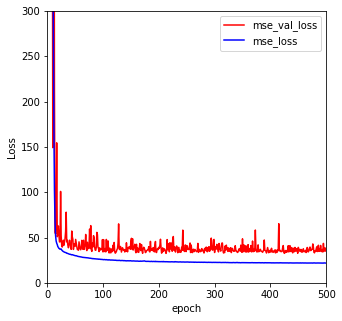

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

## 3

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Conv1D, Dense, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D,Softmax
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, Adagrad,Adadelta


def model1():
    
    model = Sequential()

    model.add(Dense(32, input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(1))
    
    
    return model


In [ ]:
model = model1()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                4096      
_________________________________________________________________
batch_normalization_55 (Batc (None, 32)                128       
_________________________________________________________________
activation_55 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_56 (Batc (None, 32)                128       
_________________________________________________________________
activation_56 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 16)               

In [ ]:
# fit model
from keras import optimizers
from tensorflow.keras.optimizers import SGD,Adagrad,Adadelta,Adam

model.compile(loss = 'mse', optimizer = Adam(lr=lrate))
hist = model.fit(X_train, dbp_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, dbp_test))


Epoch 1/500
165/165 [==============================] - 3s 16ms/step - loss: 3762.2190 - val_loss: 3787.7617
Epoch 2/500
165/165 [==============================] - 2s 14ms/step - loss: 3627.3018 - val_loss: 3630.6763
Epoch 3/500
165/165 [==============================] - 2s 14ms/step - loss: 3479.4846 - val_loss: 3337.5525
Epoch 4/500
165/165 [==============================] - 2s 14ms/step - loss: 3293.5906 - val_loss: 2999.8286
Epoch 5/500
165/165 [==============================] - 2s 14ms/step - loss: 3027.5686 - val_loss: 2424.8550
Epoch 6/500
165/165 [==============================] - 2s 15ms/step - loss: 2686.5452 - val_loss: 1812.3091
Epoch 7/500
165/165 [==============================] - 2s 15ms/step - loss: 2318.3547 - val_loss: 1559.4709
Epoch 8/500
165/165 [==============================] - 2s 15ms/step - loss: 1927.1267 - val_loss: 1187.8822
Epoch 9/500
165/165 [==============================] - 2s 15ms/step - loss: 1530.2141 - val_loss: 581.3887
Epoch 10/500
165/165 [=======

165/165 [==============================] - 2s 15ms/step - loss: 27.8699 - val_loss: 35.4716
Epoch 79/500
165/165 [==============================] - 2s 15ms/step - loss: 27.8410 - val_loss: 37.0136
Epoch 80/500
165/165 [==============================] - 2s 14ms/step - loss: 27.8294 - val_loss: 36.4243
Epoch 81/500
165/165 [==============================] - 4s 22ms/step - loss: 27.7308 - val_loss: 39.6194
Epoch 82/500
165/165 [==============================] - 2s 14ms/step - loss: 27.5948 - val_loss: 39.8075
Epoch 83/500
165/165 [==============================] - 2s 15ms/step - loss: 27.5455 - val_loss: 41.0460
Epoch 84/500
165/165 [==============================] - 2s 14ms/step - loss: 27.7261 - val_loss: 49.5488
Epoch 85/500
165/165 [==============================] - 2s 15ms/step - loss: 27.8801 - val_loss: 60.0908
Epoch 86/500
165/165 [==============================] - 2s 14ms/step - loss: 27.6056 - val_loss: 51.1873
Epoch 87/500
165/165 [==============================] - 2s 15ms/step

165/165 [==============================] - 2s 14ms/step - loss: 24.5394 - val_loss: 36.3075
Epoch 156/500
165/165 [==============================] - 2s 15ms/step - loss: 24.4912 - val_loss: 56.7041
Epoch 157/500
165/165 [==============================] - 2s 14ms/step - loss: 24.3362 - val_loss: 34.9711
Epoch 158/500
165/165 [==============================] - 2s 15ms/step - loss: 24.4139 - val_loss: 35.3301
Epoch 159/500
165/165 [==============================] - 2s 14ms/step - loss: 24.4457 - val_loss: 39.9718
Epoch 160/500
165/165 [==============================] - 2s 14ms/step - loss: 24.2781 - val_loss: 38.9591
Epoch 161/500
165/165 [==============================] - 4s 22ms/step - loss: 24.2753 - val_loss: 33.8225
Epoch 162/500
165/165 [==============================] - 2s 15ms/step - loss: 24.2138 - val_loss: 43.4392
Epoch 163/500
165/165 [==============================] - 2s 14ms/step - loss: 24.3328 - val_loss: 32.2887
Epoch 164/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 15ms/step - loss: 23.2709 - val_loss: 36.6083
Epoch 233/500
165/165 [==============================] - 2s 15ms/step - loss: 23.2929 - val_loss: 38.7356
Epoch 234/500
165/165 [==============================] - 2s 14ms/step - loss: 23.1790 - val_loss: 42.1798
Epoch 235/500
165/165 [==============================] - 2s 15ms/step - loss: 23.2626 - val_loss: 34.3087
Epoch 236/500
165/165 [==============================] - 2s 15ms/step - loss: 23.1918 - val_loss: 35.4759
Epoch 237/500
165/165 [==============================] - 2s 15ms/step - loss: 23.2154 - val_loss: 34.8014
Epoch 238/500
165/165 [==============================] - 4s 23ms/step - loss: 23.1343 - val_loss: 34.4753
Epoch 239/500
165/165 [==============================] - 2s 15ms/step - loss: 23.1622 - val_loss: 37.2267
Epoch 240/500
165/165 [==============================] - 2s 15ms/step - loss: 23.0903 - val_loss: 45.1433
Epoch 241/500
165/165 [==============================] - 2s 

165/165 [==============================] - 2s 14ms/step - loss: 22.5120 - val_loss: 36.0043
Epoch 310/500
165/165 [==============================] - 4s 23ms/step - loss: 22.4795 - val_loss: 37.0210
Epoch 311/500
165/165 [==============================] - 2s 15ms/step - loss: 22.5281 - val_loss: 39.6215
Epoch 312/500
165/165 [==============================] - 1s 6ms/step - loss: 22.5041 - val_loss: 34.4553
Epoch 313/500
165/165 [==============================] - 1s 6ms/step - loss: 22.4502 - val_loss: 34.8796
Epoch 314/500
165/165 [==============================] - 1s 7ms/step - loss: 22.5201 - val_loss: 35.2671
Epoch 315/500
165/165 [==============================] - 1s 7ms/step - loss: 22.4312 - val_loss: 34.3298
Epoch 316/500
165/165 [==============================] - 1s 7ms/step - loss: 22.4718 - val_loss: 35.8006
Epoch 317/500
165/165 [==============================] - 1s 7ms/step - loss: 22.5399 - val_loss: 37.7007
Epoch 318/500
165/165 [==============================] - 1s 7ms/st

165/165 [==============================] - 1s 7ms/step - loss: 22.0978 - val_loss: 37.8834
Epoch 388/500
165/165 [==============================] - 1s 7ms/step - loss: 21.9966 - val_loss: 38.8159
Epoch 389/500
165/165 [==============================] - 1s 6ms/step - loss: 22.1375 - val_loss: 35.7344
Epoch 390/500
165/165 [==============================] - 1s 7ms/step - loss: 22.0867 - val_loss: 36.3256
Epoch 391/500
165/165 [==============================] - 1s 7ms/step - loss: 22.0504 - val_loss: 45.8680
Epoch 392/500
165/165 [==============================] - 1s 7ms/step - loss: 22.0506 - val_loss: 37.9086
Epoch 393/500
165/165 [==============================] - 1s 7ms/step - loss: 22.0266 - val_loss: 35.9201
Epoch 394/500
165/165 [==============================] - 1s 7ms/step - loss: 22.0545 - val_loss: 35.0809
Epoch 395/500
165/165 [==============================] - 1s 7ms/step - loss: 22.1193 - val_loss: 36.2429
Epoch 396/500
165/165 [==============================] - 1s 7ms/step 

165/165 [==============================] - 6s 35ms/step - loss: 21.8438 - val_loss: 34.8142
Epoch 466/500
165/165 [==============================] - 6s 35ms/step - loss: 21.7910 - val_loss: 41.7301
Epoch 467/500
165/165 [==============================] - 6s 34ms/step - loss: 21.8726 - val_loss: 35.1716
Epoch 468/500
165/165 [==============================] - 6s 34ms/step - loss: 21.7385 - val_loss: 36.6080
Epoch 469/500
165/165 [==============================] - 6s 35ms/step - loss: 21.7865 - val_loss: 40.7599
Epoch 470/500
165/165 [==============================] - 6s 35ms/step - loss: 21.8324 - val_loss: 38.7235
Epoch 471/500
165/165 [==============================] - 6s 35ms/step - loss: 21.8444 - val_loss: 33.9466
Epoch 472/500
165/165 [==============================] - 6s 35ms/step - loss: 21.7767 - val_loss: 40.9630
Epoch 473/500
165/165 [==============================] - 6s 35ms/step - loss: 21.7643 - val_loss: 34.0780
Epoch 474/500
165/165 [==============================] - 6s 

In [ ]:
pred = model.predict(X_test)
err = dbp_test - pred
me = np.mean(err)
mae = np.mean(abs(err))
std = np.std(err)

total_me = total_me + me
total_std = total_std + std

print("\nME: ", me, "\nMAE: ", mae,"\nSD: ", std)


ME:  1.0599419889383335 
MAE:  4.428841768921792 
SD:  5.935563231229617


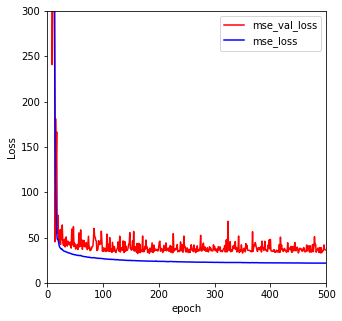

In [ ]:
plt.figure(figsize=(5, 5))

plt.subplot(111)           
plt.plot(hist.history['val_loss'],color='red')
plt.legend(['mse_val_loss'])
   
plt.plot(hist.history['loss'],color='blue')
plt.legend(['mse_val_loss', 'mse_loss'])
plt.xlabel('epoch',fontsize = 10)
plt.ylabel('Loss',fontsize = 10)
plt.axis([0, epochs, 0, 300])
fig = plt.gcf()

In [ ]:
Ensemble_me = total_me/3
Ensemble_std = total_std/3

print("\nEnsemble_me: ", Ensemble_me, "\nEnsemble_std: ", Ensemble_std)


Ensemble_me:  -0.410428222036694 
Ensemble_std:  5.918011418910268
